In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             roc_curve, 
                             auc, roc_auc_score)
from sklearn.utils import Bunch
import pickle as pkl
p=print
# PANDAS OPTION
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)

In [2]:
def plotfeatures(estimator, feat, top=20):
  coef = estimator.feature_importances_
  featimp = pd.Series(coef, feat).sort_values(ascending=False)
  plt.figure(figsize=(12,7))
  featimp[:top].plot(kind = 'barh')
  plt.xlabel('Feature Importance Score')
  plt.show
# ENDFUNCTION
def findHighCorrel(df, threshold):
  cormat=df.corr().abs() # COMPUTE CORRELATION MATRIX
  uptri=cormat.where(np.triu(np.ones(cormat.shape), k=1).astype(np.bool))
  featdrop=[col for col in uptri.columns if any(uptri[col]>threshold)]
  return featdrop
# ENDFUNCTION
def uround(x, digits=3):
  return np.round(x, digits)

In [3]:
df = pd.DataFrame(
    load_breast_cancer().data, 
    columns=load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target
# DROP HIGHLY CORRELATED FEATURES
featcorr=findHighCorrel(df,0.95) # THRESHOLD = 95%
dfn=df.drop(columns=featcorr)
p("initial nbr. of features: ", df.shape[1])
p("nbr. of features after removing highly correlated features:", dfn.shape[1])
p("features removed:\n", featcorr)

initial nbr. of features:  31
nbr. of features after removing highly correlated features: 24
features removed:
 ['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']


In [4]:
# ML ESTIMATOR = DECISION TREE
estimator = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=42, splitter='best')


Class Imbalance
Negative Class Count 212
Positive Class Count 357

roc_auc_score: 0.933


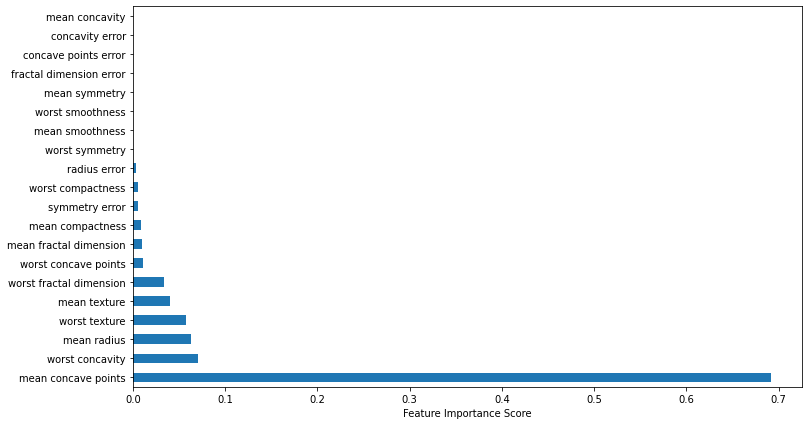

In [5]:
# WITHOUT CLASS IMBALANCE CORRECTION
p('\nClass Imbalance')
p('Negative Class Count', sum(dfn.target == 0))
p('Positive Class Count', sum(dfn.target == 1))
# DATA SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    dfn.drop(columns=['target']), dfn.target,
    test_size=0.3,shuffle=True)
# MODEL TRAINING
estimator.fit(X_train, y_train)
ypred = estimator.predict(X_test)
p('\nroc_auc_score:', uround(roc_auc_score(y_test, ypred)))
plotfeatures(estimator, dfn.drop(columns=['target']).columns, top=20)


Class Imbalance
Negative Class Count 212
Positive Class Count 2

roc_auc_score: 0.492


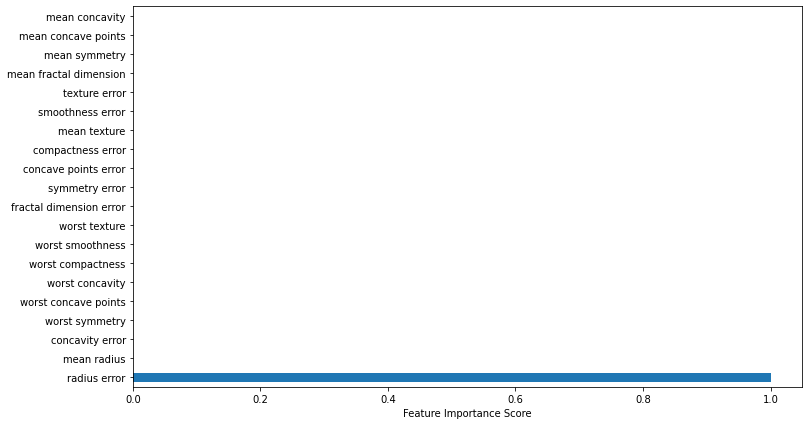

In [6]:
# WITH EXTREME CLASS IMBALANCE: 2 PER 212
dfpositive = dfn[dfn.target==1].iloc[:2]
dfnegative = dfn[dfn.target==0]
dfexp = dfnegative.append(dfpositive)
p('\nClass Imbalance')
p('Negative Class Count', sum(dfexp.target == 0))
p('Positive Class Count', sum(dfexp.target == 1))
X_train, X_test, y_train, y_test = train_test_split(
  dfexp.drop(columns=['target']),dfexp.target,
  test_size=0.3,shuffle=True, stratify=dfexp.target)
estimator.fit(X_train, y_train)
ypred = estimator.predict(X_test)
p('\nroc_auc_score:', uround(roc_auc_score(y_test, ypred)))
plotfeatures(estimator, dfn.drop(columns=['target']).columns, top=20)


Class Imbalance
Negative Class Count 212
Positive Class Count 125

roc_auc_score: 0.906


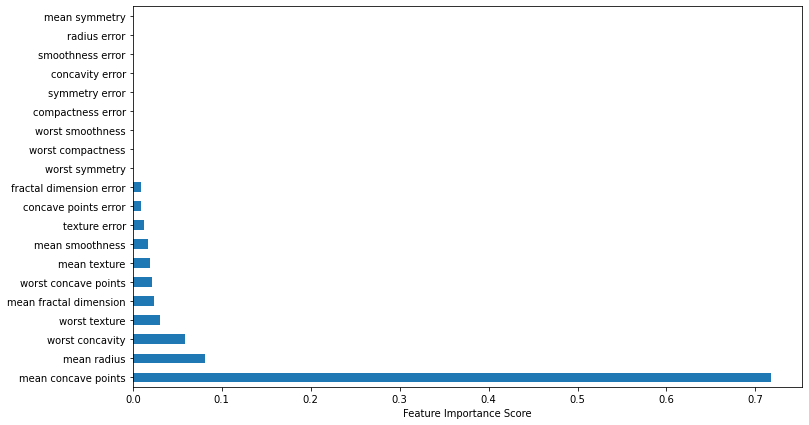

In [7]:
# WITH MODERATE CLASS IMBALANCE: 125 per 212
dfpositive = dfn[dfn.target==1].iloc[:125]
dfnegative = dfn[dfn.target==0]
dfexp = dfnegative.append(dfpositive)
p('\nClass Imbalance')
p('Negative Class Count', sum(dfexp.target==0))
p('Positive Class Count', sum(dfexp.target==1))
X_train, X_test, y_train, y_test = train_test_split(
    dfexp.drop(columns=['target']),dfexp.target,
    test_size=0.3,shuffle=True, stratify=dfexp.target)
estimator.fit(X_train, y_train)
ypred = estimator.predict(X_test)
p('\nroc_auc_score:', uround(roc_auc_score(y_test, ypred)))
plotfeatures(estimator, dfn.drop(columns=['target']).columns, top=20)


Class Imbalance
Negative Class Count 212
Positive Class Count 30

roc_auc_score: 0.889


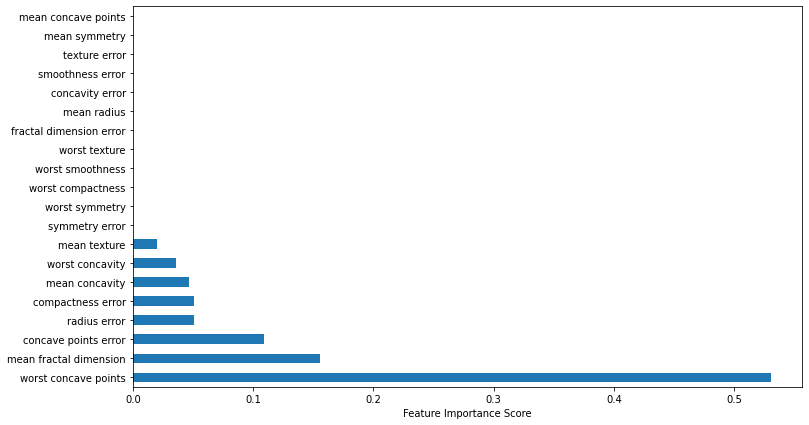

In [8]:
# WITH CLASS IMBALANCE: 10 per 212
dfpositive = dfn[dfn.target==1].iloc[:30]
dfnegative = dfn[dfn.target==0]
dfexp = dfnegative.append(dfpositive)
p('\nClass Imbalance')
p('Negative Class Count', sum(dfexp.target==0))
p('Positive Class Count', sum(dfexp.target==1))
X_train, X_test, y_train, y_test = train_test_split(
    dfexp.drop(columns=['target']), dfexp.target,
    test_size=0.3, shuffle=True, stratify=dfexp.target)
estimator.fit(X_train, y_train)
ypred = estimator.predict(X_test)
p('\nroc_auc_score:', uround(roc_auc_score(y_test, ypred)))
plotfeatures(estimator, dfn.drop(columns=['target']).columns, top=20)